In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import sys
import os
assert sys.version_info >= (3, 7)

import numpy as np
import pandas as pd

# To plot pretty figures
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# dataset = pd.read_csv("D:\\UIUC\\CS410\\Project\\fake_reviews_dataset.csv")
dataset = pd.read_csv("https://raw.githubusercontent.com/gdeb2/CourseProject/main/Project/cleanReviews.csv")
dataset.head()

,category,rating,label,original_text,clean_text,word_count,character_count,capital_letters_count,digit_count,punctuation_count,sentiment_score
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love pretty,13,75,4,0,5,0.9593
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love great upgrade original 've mine couple year,16,80,1,0,3,0.8910
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,14,67,2,0,2,0.7906
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use great product price,17,81,2,0,2,0.7463
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two month,18,85,3,0,2,0.7397


In [3]:
dataset.describe(include = "all")

,category,rating,label,original_text,clean_text,word_count,character_count,capital_letters_count,digit_count,punctuation_count,sentiment_score
count,40432,40432.000000,40432,40432,40431,40432.000000,40432.000000,40432.000000,40432.00000,40432.000000,40432.000000
unique,10,NaN,2,40412,40388,NaN,NaN,NaN,NaN,NaN,NaN
top,Kindle_Store_5,NaN,OR,One of the best movies of the year. Not for e...,dog love kept occupied long time chase,NaN,NaN,NaN,NaN,NaN,NaN
freq,4730,NaN,20216,2,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.256579,NaN,NaN,NaN,66.452266,351.271963,9.782573,1.12453,10.218515,0.608508
std,NaN,1.144354,NaN,NaN,NaN,68.465512,369.813570,15.821904,3.66402,13.246362,0.470277
min,NaN,1.000000,NaN,NaN,NaN,-47.000000,24.000000,0.000000,0.00000,0.000000,-0.999700
25%,NaN,4.000000,NaN,NaN,NaN,20.000000,107.000000,3.000000,0.00000,3.000000,0.440400
50%,NaN,5.000000,NaN,NaN,NaN,38.000000,198.000000,5.000000,0.00000,6.000000,0.815750
75%,NaN,5.000000,NaN,NaN,NaN,84.000000,439.000000,11.000000,1.00000,12.000000,0.941225


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               40432 non-null  object 
 1   rating                 40432 non-null  float64
 2   label                  40432 non-null  object 
 3   original_text          40432 non-null  object 
 4   clean_text             40431 non-null  object 
 5   word_count             40432 non-null  int64  
 6   character_count        40432 non-null  int64  
 7   capital_letters_count  40432 non-null  int64  
 8   digit_count            40432 non-null  int64  
 9   punctuation_count      40432 non-null  int64  
 10  sentiment_score        40432 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 3.4+ MB


In [5]:
dataset.isna().sum()

category                 0
rating                   0
label                    0
original_text            0
clean_text               1
word_count               0
character_count          0
capital_letters_count    0
digit_count              0
punctuation_count        0
sentiment_score          0
dtype: int64

In [6]:
# get the unique classifier
dataset.label.unique()

array(['CG', 'OR'], dtype=object)

In [7]:
# get the size of unique classifier
dataset.label.unique().size

2

In [8]:
dataset.groupby(['label']).count()

,category,rating,original_text,clean_text,word_count,character_count,capital_letters_count,digit_count,punctuation_count,sentiment_score
label,,,,,,,,,,
CG,20216,20216,20216,20215,20216,20216,20216,20216,20216,20216
OR,20216,20216,20216,20216,20216,20216,20216,20216,20216,20216


In [9]:
dataset.rating.unique()

array([5., 1., 3., 2., 4.])

In [10]:
dataset.groupby(['rating']).count()

,category,label,original_text,clean_text,word_count,character_count,capital_letters_count,digit_count,punctuation_count,sentiment_score
rating,,,,,,,,,,
1.0,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155
2.0,1967,1967,1967,1967,1967,1967,1967,1967,1967,1967
3.0,3786,3786,3786,3786,3786,3786,3786,3786,3786,3786
4.0,7965,7965,7965,7964,7965,7965,7965,7965,7965,7965
5.0,24559,24559,24559,24559,24559,24559,24559,24559,24559,24559


In [11]:
dataset.category.unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [12]:
dataset.groupby(['category']).count()

,rating,label,original_text,clean_text,word_count,character_count,capital_letters_count,digit_count,punctuation_count,sentiment_score
category,,,,,,,,,,
Books_5,4370,4370,4370,4370,4370,4370,4370,4370,4370,4370
Clothing_Shoes_and_Jewelry_5,3848,3848,3848,3847,3848,3848,3848,3848,3848,3848
Electronics_5,3988,3988,3988,3988,3988,3988,3988,3988,3988,3988
Home_and_Kitchen_5,4056,4056,4056,4056,4056,4056,4056,4056,4056,4056
Kindle_Store_5,4730,4730,4730,4730,4730,4730,4730,4730,4730,4730
Movies_and_TV_5,3588,3588,3588,3588,3588,3588,3588,3588,3588,3588
Pet_Supplies_5,4254,4254,4254,4254,4254,4254,4254,4254,4254,4254
Sports_and_Outdoors_5,3946,3946,3946,3946,3946,3946,3946,3946,3946,3946
Tools_and_Home_Improvement_5,3858,3858,3858,3858,3858,3858,3858,3858,3858,3858


In [13]:
dataset_copy = dataset.copy()
dataset_copy.describe()

,rating,word_count,character_count,capital_letters_count,digit_count,punctuation_count,sentiment_score
count,40432.000000,40432.000000,40432.000000,40432.000000,40432.00000,40432.000000,40432.000000
mean,4.256579,66.452266,351.271963,9.782573,1.12453,10.218515,0.608508
std,1.144354,68.465512,369.813570,15.821904,3.66402,13.246362,0.470277
min,1.000000,-47.000000,24.000000,0.000000,0.00000,0.000000,-0.999700
25%,4.000000,20.000000,107.000000,3.000000,0.00000,3.000000,0.440400
50%,5.000000,38.000000,198.000000,5.000000,0.00000,6.000000,0.815750
75%,5.000000,84.000000,439.000000,11.000000,1.00000,12.000000,0.941225
max,5.000000,366.000000,2827.000000,805.000000,155.00000,347.000000,0.999900


In [14]:
dataset_copy = dataset.drop(columns=['rating','original_text','clean_text','word_count','character_count','capital_letters_count','digit_count','punctuation_count','sentiment_score'])
dataset_copy.groupby(['label']).count()

,category
label,
CG,20216
OR,20216


<Figure size 1800x720 with 0 Axes>

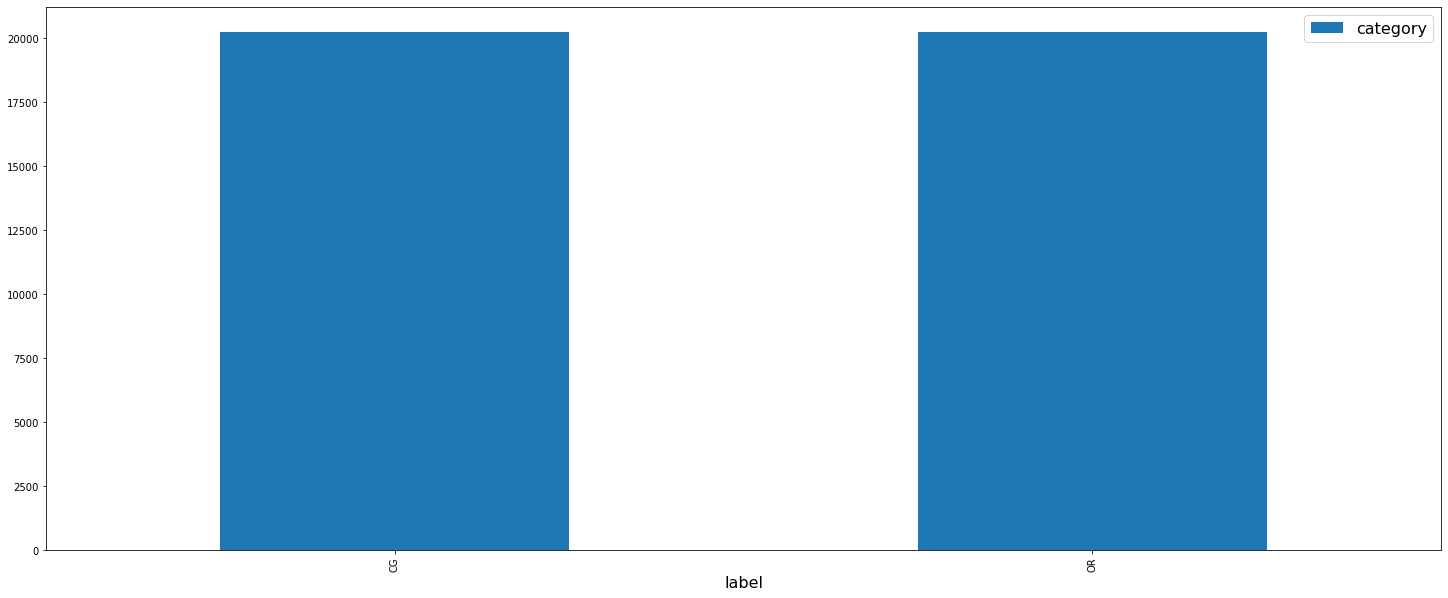

In [15]:
fig = plt.figure()
dataset_copy.groupby('label').count().plot(kind='bar')
plt.show()

In [16]:
dataset_copy = dataset.drop(columns=['category','original_text','clean_text','word_count','character_count','capital_letters_count','digit_count','punctuation_count','sentiment_score'])
dataset_copy.groupby(['rating']).count().transpose()

rating,1.0,2.0,3.0,4.0,5.0
label,2155,1967,3786,7965,24559


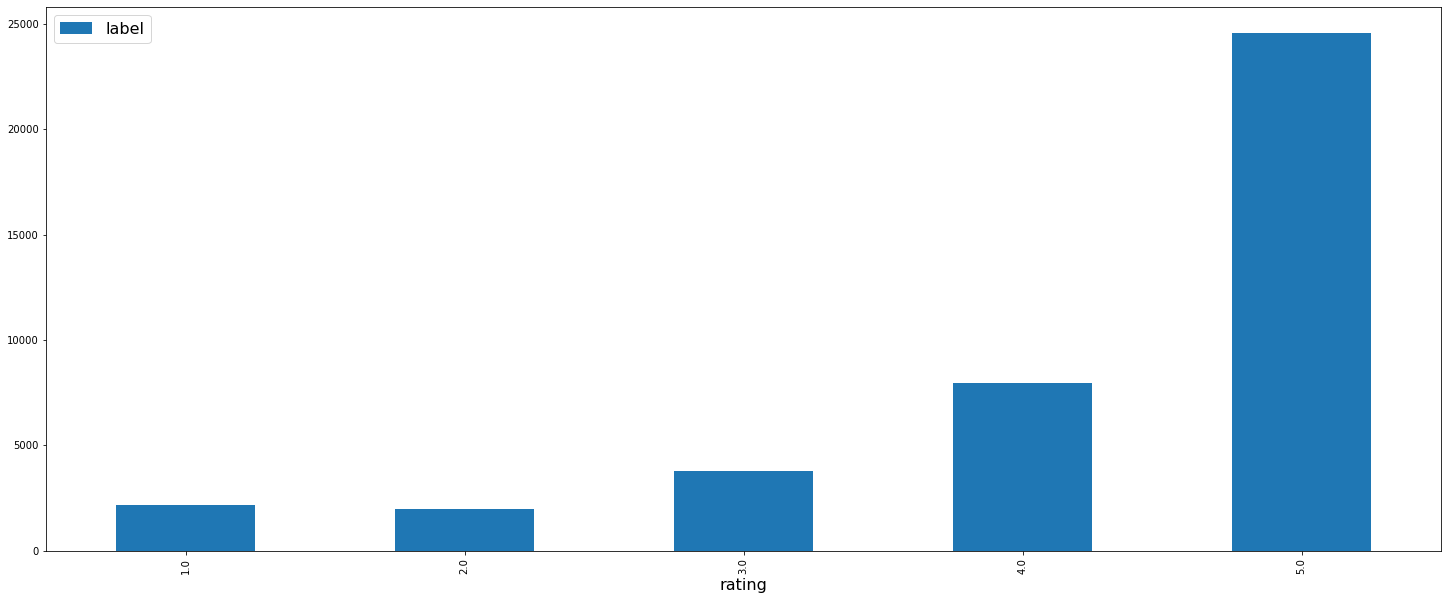

In [17]:
dataset_copy.groupby('rating').count().plot(kind='bar')
plt.show()

In [18]:
dataset_copy = dataset.drop(columns=['original_text','clean_text','word_count','character_count','capital_letters_count','digit_count','punctuation_count','sentiment_score'])
dataset_copy.groupby(['rating','label']).count()

category
rating label          
1.0    CG         1063
       OR         1092
2.0    CG          962
       OR         1005
3.0    CG         1952
       OR         1834
4.0    CG         3920
       OR         4045
5.0    CG        12319
       OR        12240

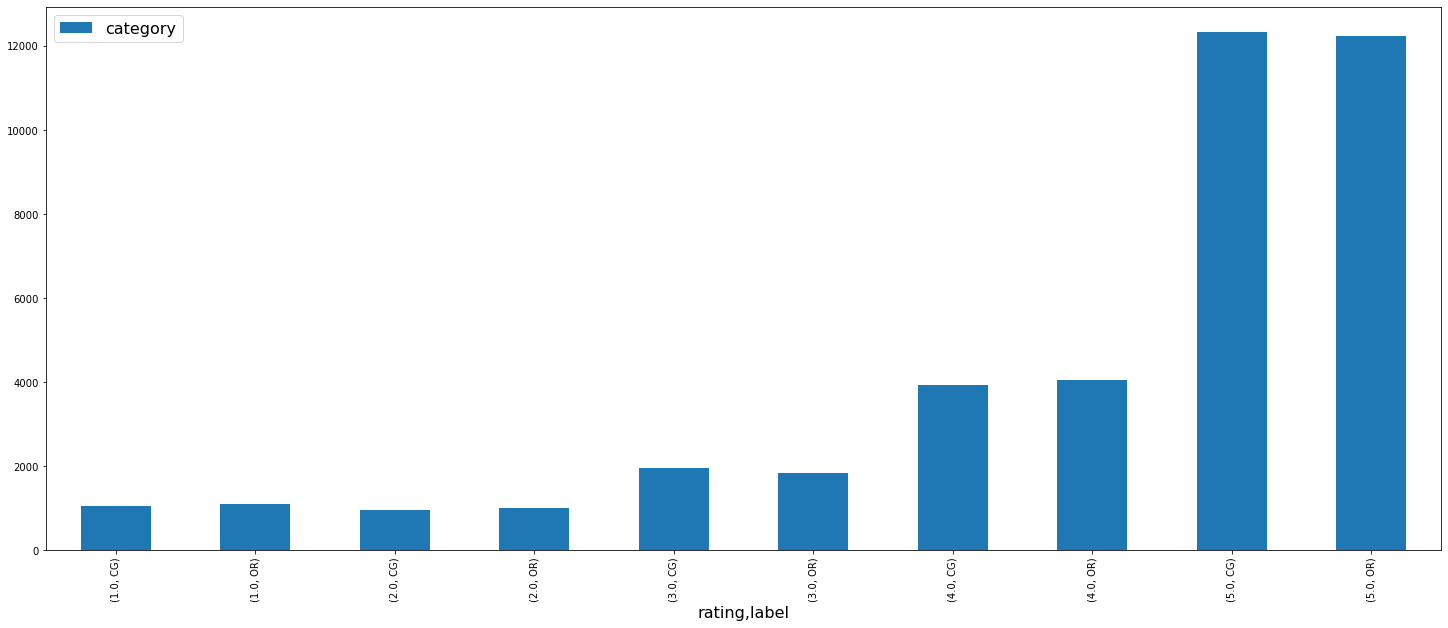

In [19]:
dataset_copy.groupby(['rating','label']).count().plot(kind='bar')
plt.show()

In [20]:
dataset_copy = dataset.drop(columns=['original_text','clean_text','word_count','character_count','capital_letters_count','digit_count','punctuation_count','sentiment_score'])
dataset_copy.groupby(['category','label']).count()

rating
category                     label        
Books_5                      CG       2185
                             OR       2185
Clothing_Shoes_and_Jewelry_5 CG       1924
                             OR       1924
Electronics_5                CG       1994
                             OR       1994
Home_and_Kitchen_5           CG       2028
                             OR       2028
Kindle_Store_5               CG       2365
                             OR       2365
Movies_and_TV_5              CG       1794
                             OR       1794
Pet_Supplies_5               CG       2127
                             OR       2127
Sports_and_Outdoors_5        CG       1973
                             OR       1973
Tools_and_Home_Improvement_5 CG       1929
                             OR       1929
Toys_and_Games_5             CG       1897
                             OR       1897

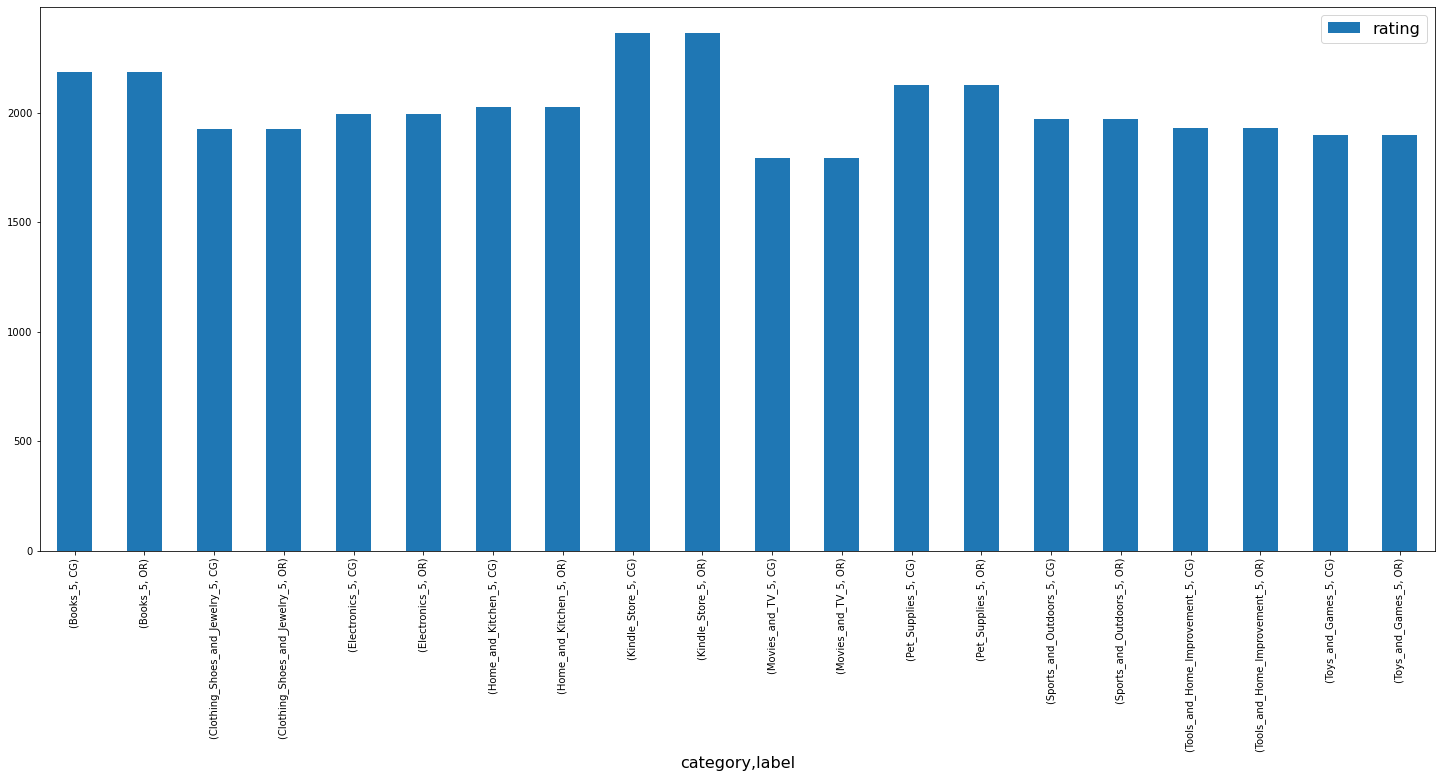

In [21]:
dataset_copy.groupby(['category','label']).count().plot(kind='bar')
plt.show()

In [22]:
dataset.corr()

,rating,word_count,character_count,capital_letters_count,digit_count,punctuation_count,sentiment_score
rating,1.000000,-0.079109,-0.078113,-0.053485,-0.044848,-0.075332,0.293176
word_count,-0.079109,1.000000,0.988442,0.582812,0.346017,0.779792,0.196604
character_count,-0.078113,0.988442,1.000000,0.611020,0.391206,0.842517,0.188342
capital_letters_count,-0.053485,0.582812,0.611020,1.000000,0.373981,0.623788,0.095729
digit_count,-0.044848,0.346017,0.391206,0.373981,1.000000,0.518821,0.026841
punctuation_count,-0.075332,0.779792,0.842517,0.623788,0.518821,1.000000,0.145243
sentiment_score,0.293176,0.196604,0.188342,0.095729,0.026841,0.145243,1.000000
